<a href="https://colab.research.google.com/github/PryDatar/GymProgressTracker/blob/main/ProgressWorkout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install gspread
!pip install openpyxl

In [55]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [56]:
worksheet = gc.open('TrackingSalle').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

import pandas as pd
data = pd.DataFrame.from_records(rows)
data.columns = data.iloc[0]
data = data[1:]

data

,Jour_Pecs,Bench,Incliné,Pec FLy,Dips,,Jour_Epaules,Presse,Butterfly,Elevations Lat,...,Jour_Triceps,Couché,Poulie Haute,Dips,,Jour_Dos,Tractions,Horizontal,Abs Inversés,Rowing
1,18/10/23,9 8 6 6 5 : 60,11 10 10 10 9 : 32,11 : 28 12 10 9 9 : 23,9 8 6 6 4 : 75,,,,,,...,,,,,,,,,,
2,20/10/23,8 7 5 5 4 : 60,10 10 8 8 6 : 32,12 10 10 11 9 : 23,8 7 6 5 4 : 75,,,,,,...,,,,,,,,,,


In [57]:
import numpy as np

dataPecs = data.iloc[:, :5]
dataEpaules = data.iloc[:, 6:10]
dataBiceps = data.iloc[:, 11:15]
dataTriceps = data.iloc[:, 16:20]
dataDos = data.iloc[:, 21:26]

In [58]:
dataPecs

,Jour_Pecs,Bench,Incliné,Pec FLy,Dips
1,18/10/23,9 8 6 6 5 : 60,11 10 10 10 9 : 32,11 : 28 12 10 9 9 : 23,9 8 6 6 4 : 75
2,20/10/23,8 7 5 5 4 : 60,10 10 8 8 6 : 32,12 10 10 11 9 : 23,8 7 6 5 4 : 75


In [59]:
dataEpaules

,Jour_Epaules,Presse,Butterfly,Elevations Lat
1,,,,
2,,,,


In [60]:
dataBiceps

,Jour_Biceps,Preacher,Hammer,Incliné
1,,,,
2,,,,


In [61]:
dataTriceps

,Jour_Triceps,Couché,Poulie Haute,Dips
1,,,,
2,,,,


In [62]:
dataDos

,Jour_Dos,Tractions,Horizontal,Abs Inversés,Rowing
1,,,,,
2,,,,,


1    9 8 6 6 5 : 60
2    8 7 5 5 4 : 60
Name: Bench, dtype: object
[['9', '8', '6', '6', '5'], ['8', '7', '5', '5', '4']]


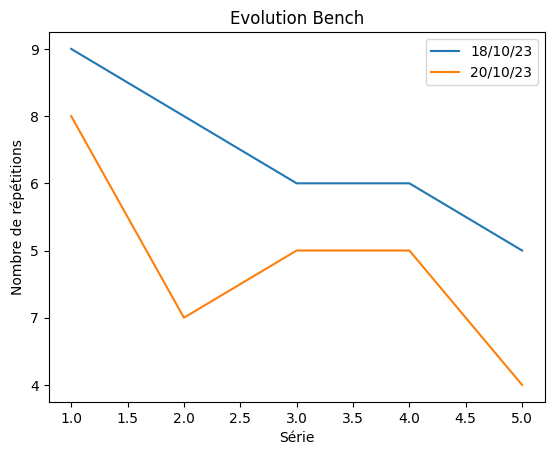

1    11 10 10 10 9 : 32
2      10 10 8 8 6 : 32
Name: Incliné, dtype: object
[['11', '10', '10', '10', '9'], ['10', '10', '8', '8', '6']]


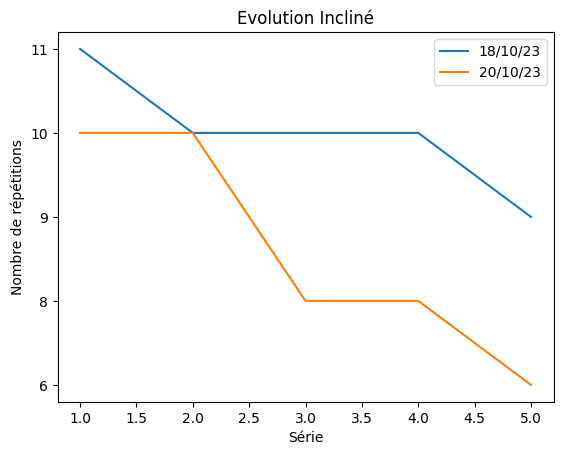

1     11 : 28 12 10 9 9 : 23
2         12 10 10 11 9 : 23
Name: Pec FLy, dtype: object
[['', '11', ':', '28', '12'], ['12', '10', '10', '11', '9']]


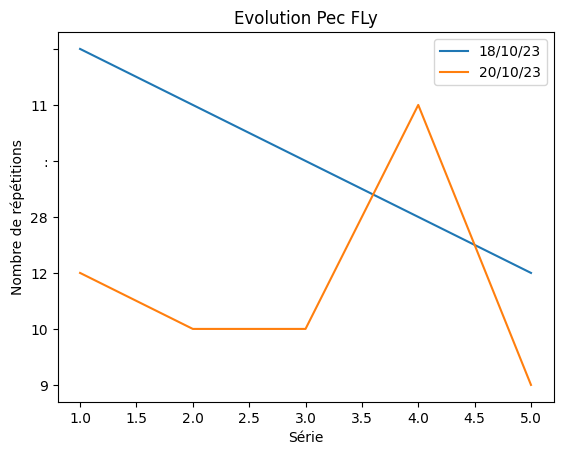

1    9 8 6 6 4 : 75
2    8 7 6 5 4 : 75
Name: Dips, dtype: object
[['9', '8', '6', '6', '4'], ['8', '7', '6', '5', '4']]


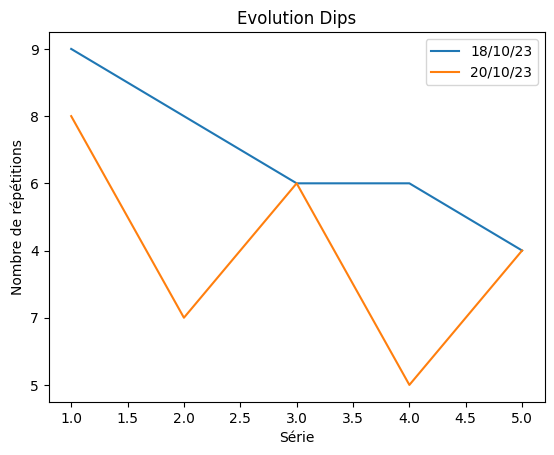

In [63]:
import matplotlib.pyplot as plt

def printLists(reps_data, df, label):
  for i, reps in enumerate(reps_data):
    series = range(1, len(reps) + 1)  # Numéro de série
    plt.plot(series, reps, label=f'{df.iloc[:, 0][series[i]]}')
  plt.xlabel('Série')
  plt.ylabel('Nombre de répétitions')
  plt.title(f'Evolution {label}')
  plt.legend()
  plt.gca().invert_yaxis()
  plt.show()


def graphExo(df, label):
  tmp = df[label]
  print(tmp)
  series = []
  for s in tmp:
    t = s.split(' ')
    serie = t[:5]
    series.append(serie)
  print(series)
  printLists(series, df, label)

def graphsExo(df):
  for l in df.columns[1:]:
    graphExo(df, l)

graphsExo(dataPecs)